In [2]:
# Keras实践——线性回归
import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#顺序模型
from keras.models import Sequential
#全连接层
from keras.layers import Dense
#使用numpy生成100个随机点
x_data = np.random.rand(100)
'''
loc：float
    此概率分布的均值（对应着整个分布的中心centre）
scale：float
    此概率分布的标准差（对应于分布的宽度，scale越大越矮胖，scale越小，越瘦高）
size：int or tuple of ints
    输出的shape，默认为None，只输出一个值
'''
noise = np.random.normal(loc=0,scale=0.01,size=x_data.shape)

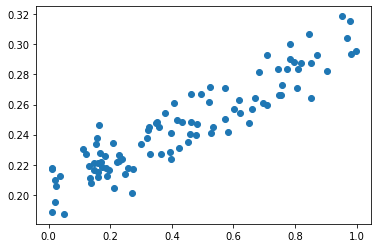

In [4]:
y_data = x_data * 0.1 +0.2 +noise

#显示随机点
plt.scatter(x_data,y_data)
plt.show()

In [5]:
#构建一个顺序模型
# Sequential模型可以构建非常复杂的神经网络，包括全连接神经网络、卷积神经网络(CNN)、循环神经网络(RNN)、等等。这里的Sequential更准确的应该理解为堆叠，通过堆叠许多层，构建出深度神经网络。
model = Sequential()
#在模型中添加一个全连接层
model.add(Dense(units=1,input_dim=1))
# 优化器选择的是 sgd 随机梯度下降 损失函数 是mse 均方误差
model.compile(optimizer='sgd',loss='mse')

for step in range(3001):
    #每次训练一个批次
    cost = model.train_on_batch(x_data,y_data)
    #每500次打印一下cost值
    if step %500 ==0:
        print("COST",cost)
#打印权值和偏执值
w,b = model.layers[0].get_weights()
# w参数的作用，我们可以得到，是决定那个分割平面的方向所在.分割平面的投影就是直线w1x1+w2x2+b=0
# b是决定竖直平面沿着垂直于直线方向移动的距离，当b>0的时候，直线往左边移动，当b<0的时候，直线往右边移动.
print("权值",w,"偏执值",b)

COST 1.0044794082641602
COST 0.03313225880265236
COST 0.009221706539392471
COST 0.0026374494191259146
COST 0.0008243420743383467
COST 0.00032506740535609424
COST 0.00018758204532787204
权值 [[0.07279468]] 偏执值 [0.21480721]


In [6]:
x_data

array([0.81965418, 0.22908347, 0.65211675, 0.18481588, 0.95132895,
       0.77468427, 0.32790524, 0.78397558, 0.46230389, 0.57326605,
       0.43452543, 0.11216465, 0.32038735, 0.19543572, 0.02369993,
       0.1591573 , 0.74644338, 0.39534674, 0.3260384 , 0.45163975,
       0.52417943, 0.78218782, 0.99825914, 0.52569194, 0.01890104,
       0.01977992, 0.45869087, 0.00965152, 0.37847571, 0.46376758,
       0.35163029, 0.16164368, 0.13415985, 0.75425793, 0.69603017,
       0.30006146, 0.49400629, 0.20796668, 0.51926781, 0.03759421,
       0.14602081, 0.18136269, 0.15373491, 0.41810563, 0.58219124,
       0.32240685, 0.15937451, 0.84629749, 0.21250977, 0.74356543,
       0.9048604 , 0.85287897, 0.23816989, 0.2576104 , 0.75802657,
       0.04887152, 0.70964018, 0.26994674, 0.13866529, 0.12947087,
       0.85248282, 0.36599239, 0.71005333, 0.57329098, 0.22182412,
       0.01187573, 0.22663903, 0.68257258, 0.27526239, 0.16938583,
       0.34729815, 0.12233945, 0.40690146, 0.00953093, 0.15793

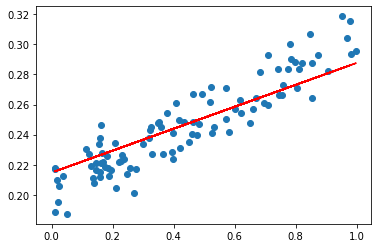

In [9]:
# x_data输入网络中，得到预测值
y_pred = model.predict(x_data)
#显示随机点
plt.scatter(x_data,y_data)
# 后面是y轴的范围
'''
format_string 由颜色字符、风格字符、标记字符组成
颜色字符
'b' 蓝色 'm' 洋红色 magenta
'g' 绿色 'y' 黄色
'r' 红色 'k' 黑色
'w' 白色 'c' 青绿色 cyan
'#008000' RGB某颜色 '0.8' 灰度值字符串
多条曲线不指定颜色时，会自动选择不同颜色
风格字符
'‐' 实线
'‐‐' 破折线
'‐.' 点划线
':' 虚线
'' ' ' 无线条
标记字符
'.' 点标记
',' 像素标记(极小点)
'o' 实心圈标记
'v' 倒三角标记
'^' 上三角标记
'>' 右三角标记
'<' 左三角标记...等等
'''
plt.plot(x_data,y_pred,'r-',0.3)
plt.show()

In [8]:
# 计算预测的分数
from sklearn.metrics import explained_variance_score
score=explained_variance_score(y_data,y_pred)
print('evs: %.2f%%'%(score*100.0))

evs: 78.96%


In [38]:
#随便测一个数据
a = np.array([0.2])
y3 = model.predict(a)
y3

array([[0.21887982]], dtype=float32)